# Image classification

**DESCRIPTION**

**Project Objective:**


Build a CNN model that classifies the given pet images correctly into dog and cat images.
The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and non-functional requirements for the project, it also serves as an input for project scoping.


**Project Description and Scope: **


You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.

You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data.


**Project Guidelines:**


Begin by creating the ipynb file in the same parent folder where the downloaded data set is kept. The CNN model should have the following layers:

● Input layer

● Convolutional layer 1 with 32 filters of kernel size[5,5]

● Pooling layer 1 with pool size[2,2] and stride 2

● Convolutional layer 2 with 64 filters of kernel size[5,5]

● Pooling layer 2 with pool size[2,2] and stride 2

● Dense layer whose output size is fixed in the hyper parameter: fc_size=32

● Dropout layer with dropout probability 0.4


*Predict the class by doing a softmax on the output of the dropout layers.
This should be followed by training and evaluation:*
● For the training step, define the loss function and minimize it

● For the evaluation step, calculate the accuracy

Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data.


## Setup


###Instal library

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 35.6 MB/s 



###Import TensorFlow and other necessary libraries:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input, Model

In [ ]:
from google.colab import files

In [ ]:
import os

In [ ]:
from livelossplot import PlotLossesKerasTF

## Download and explore the dataset

###Create path for data

In [ ]:
def createDirectory(path):
  # checking if the directory demo_folder
  # exist or not
  if not os.path.exists(path):
    # if the demo_folder directory is not present
    # then create it
    os.makedirs(path)

In [ ]:
createDirectory('/content/data/train/cats')
createDirectory('/content/data/train/dogs')
createDirectory('/content/data/test/cats')
createDirectory('/content/data/test/dogs')

###Upload train and test data

In [ ]:
#Upload data on colab
uploaded = files.upload()

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Saving 10.jpg to 10.jpg
Saving 11.jpg to 11.jpg
Saving 12.jpg to 12.jpg
Saving 13.jpg to 13.jpg
Saving 14.jpg to 14.jpg
Saving 15.jpg to 15.jpg
Saving 16.jpg to 16.jpg
Saving 17.jpg to 17.jpg
Saving 18.jpg to 18.jpg
Saving 19.jpg to 19.jpg
Saving 20.jpg to 20.jpg


In [ ]:
path = '/content/data/train/cats'
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  os.replace(fn, os.path.join(path, fn))

User uploaded file "1.jpg" with length 16868 bytes
User uploaded file "2.jpg" with length 26997 bytes
User uploaded file "3.jpg" with length 37954 bytes
User uploaded file "4.jpg" with length 20465 bytes
User uploaded file "5.jpg" with length 5751 bytes
User uploaded file "6.jpg" with length 31144 bytes
User uploaded file "7.jpg" with length 37333 bytes
User uploaded file "8.jpg" with length 39127 bytes
User uploaded file "9.jpg" with length 33992 bytes
User uploaded file "10.jpg" with length 35381 bytes
User uploaded file "11.jpg" with length 32280 bytes
User uploaded file "12.jpg" with length 21751 bytes
User uploaded file "13.jpg" with length 10926 bytes
User uploaded file "14.jpg" with length 16642 bytes
User uploaded file "15.jpg" with length 32764 bytes
User uploaded file "16.jpg" with length 22232 bytes
User uploaded file "17.jpg" with length 33202 bytes
User uploaded file "18.jpg" with length 30977 bytes
User uploaded file "19.jpg" with length 15157 bytes
User uploaded file "20

In [ ]:
import pathlib

In [ ]:
train_dir = '/content/data/train'
train_dir = pathlib.Path(train_dir)

In [ ]:
test_dir = '/content/data/test'
test_dir = pathlib.Path(test_dir)

In [ ]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

40


## Load data using a Keras utility

Next, load these images off disk using the helpful `tf.keras.utils.image_dataset_from_directory` utility. This will take us from a directory of images on disk to a `tf.data.Dataset` in just a couple lines of code.

### Create a dataset

Find size of image

In [ ]:
#find name of all images ending with jpg
root = '/content/data'
lst_all_filename = []
for path, subdirs, files in os.walk(root):
    for name in files:
      if name.endswith(".jpg"):
          lst_all_filename.append(os.path.join(path, name))

In [ ]:
#Get all image size
lst_size = []
for filename in lst_all_filename:
  tmp_size = np.array(PIL.Image.open(filename).convert('RGB')).shape
  lst_size.append(tmp_size)

#Find minimal size
h, w, _ = zip(*lst_size)
print('minimal size of heigh {}, minimal size of wight {}'.format(min(h), min(w)))

minimal size of heigh 102, minimal size of wight 98


Define some parameters for the loader:

In [ ]:
batch_size = 5
img_height = 100
img_width = 100
img_channel = 3

Resize image

In [ ]:
for filename in lst_all_filename:
  im = PIL.Image.open(filename)
  im = im.resize((img_height, img_width))
  im.save(filename)

Test if image are resized

In [ ]:
#Get all image size
lst_size = []
for filename in lst_all_filename:
  tmp_size = np.array(PIL.Image.open(filename).convert('RGB')).shape
  lst_size.append(tmp_size)

#Find minimal size
h, w, _ = zip(*lst_size)
print('''Mean of all size of height {},
Standard deviation of all size of height {},
Mean of all size of width {},
Standard deviation of all size of width {}'''.format(np.mean(h), np.std(h), np.mean(w), np.std(w)))

Mean of all size of height 100.0,
Standard deviation of all size of height 0.0,
Mean of all size of width 100.0,
Standard deviation of all size of width 0.0


Mean of all size of height is equal with *img_height*,

Mean of all size of width is equal with *img_width*,

If standard deviation is zero mean that all data have same value,


Split data in test and validation

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  image_size=(img_height, img_width),
  shuffle=True,
  seed=12534,
  batch_size=batch_size)

Found 40 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  shuffle=True,
  seed=42,
  batch_size=batch_size)

Found 20 files belonging to 2 classes.


We can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.

In [ ]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


## Visualize the data

Here are the first three images from the training dataset:

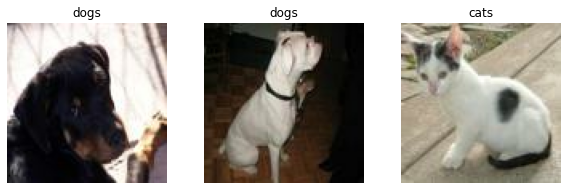

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

We will pass these datasets to the Keras `Model.fit` method for training later in this tutorial. If you like, you can also manually iterate over the dataset and retrieve batches of images:

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(5, 100, 100, 3)
(5,)


## Configure the dataset for performance

Make sure to use buffered prefetching, so we can yield data from disk without having I/O become blocking. These are two important methods we need to use when loading data:

- `Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training our model. If our dataset is too large to fit into memory, we can also use this method to create a performant on-disk cache.
- `Dataset.prefetch` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network; in general we should seek to make our input values small.

Here, we will standardize values to be in the `[0, 1]` range by using `tf.keras.layers.Rescaling`:

In [ ]:
normalization_layer = layers.Rescaling(1./255)

There are two ways to use this layer. We can apply it to the dataset by calling `Dataset.map`:

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


## A basic Keras model

### Create the model

The CNN model have the following layers:

● Input layer

● Convolutional layer 1 with 32 filters of kernel size[5,5]

● Pooling layer 1 with pool size[2,2] and stride 2

● Convolutional layer 2 with 64 filters of kernel size[5,5]

● Pooling layer 2 with pool size[2,2] and stride 2

● Dense layer whose output size is fixed in the hyper parameter: fc_size=32

● Dropout layer with dropout probability 0.4

● Prediction class softmax layer

In [ ]:
num_classes = len(class_names)

input = Input(
              shape=(img_height, img_width, img_channel),
              batch_size=batch_size,
              name='Input',
              dtype=np.uint8
              )
x = layers.Rescaling(1./255,
                     input_shape=(img_height, img_width, img_channel))(input)
x = layers.Conv2D(32, 5, padding='same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid')(x)
x = layers.Conv2D(64, 5, padding='same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid')(x)
x = layers.Flatten()(x)
x = layers.Dense(num_classes, activation='relu')(x)
x = layers.Dropout(rate=0.4)(x)
output = layers.Softmax()(x)


In [ ]:
#create model
model = Model(input, output)

### Compile the model

For this tutorial, choose the `tf.keras.optimizers.Adam` optimizer and `tf.keras.losses.SparseCategoricalCrossentropy` loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument to `Model.compile`.

In [ ]:
op_sgd = keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    name='SGD'
)

In [ ]:
model.compile(optimizer=op_sgd,
              loss='mse',
              metrics=['accuracy'])

### Model summary

View all the layers of the network using the Keras `Model.summary` method:

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(5, 100, 100, 3)]        0         
                                                                 
 rescaling_1 (Rescaling)     (5, 100, 100, 3)          0         
                                                                 
 conv2d (Conv2D)             (5, 100, 100, 32)         2432      
                                                                 
 max_pooling2d (MaxPooling2D  (5, 50, 50, 32)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (5, 50, 50, 64)           51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (5, 25, 25, 64)          0         
 2D)                                                         

### Train and visualize the model results

Train the model for 100 epochs with the Keras `Model.fit` method:

In [ ]:
#create model
model_100 = Model(input, output)
model_100.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

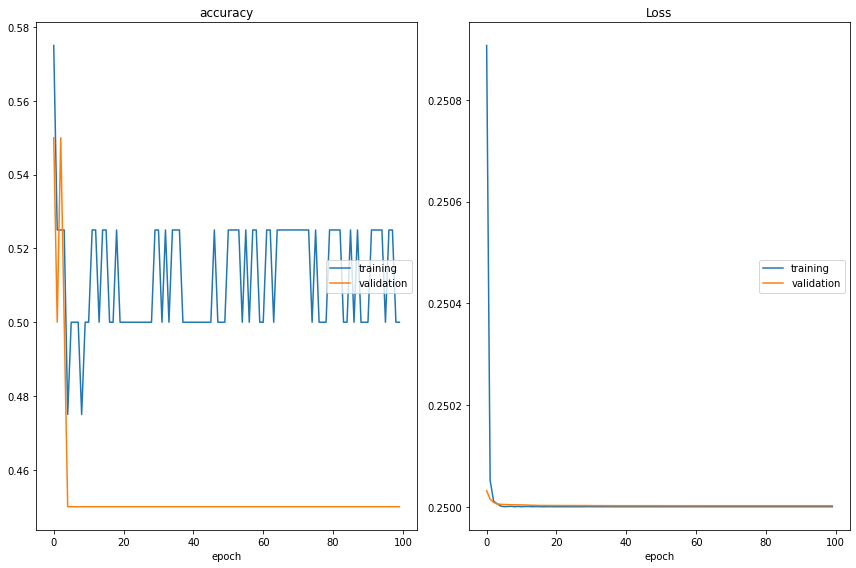

accuracy
	training         	 (min:    0.475, max:    0.575, cur:    0.500)
	validation       	 (min:    0.450, max:    0.550, cur:    0.450)
Loss
	training         	 (min:    0.250, max:    0.251, cur:    0.250)
	validation       	 (min:    0.250, max:    0.250, cur:    0.250)
8/8 [==============================] - 1s 82ms/step - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.4500


In [ ]:
epochs=100
history = model_100.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[PlotLossesKerasTF()]
)

Train the model for 200 epochs with the Keras `Model.fit` method:

In [ ]:
#create model
model_200 = Model(input, output)
model_200.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

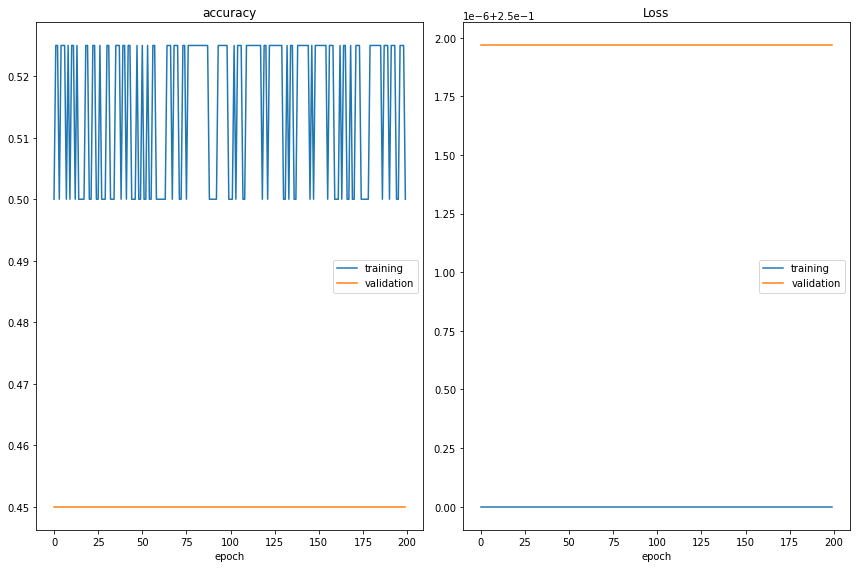

accuracy
	training         	 (min:    0.500, max:    0.525, cur:    0.500)
	validation       	 (min:    0.450, max:    0.450, cur:    0.450)
Loss
	training         	 (min:    0.250, max:    0.250, cur:    0.250)
	validation       	 (min:    0.250, max:    0.250, cur:    0.250)
8/8 [==============================] - 0s 62ms/step - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.4500


In [ ]:
epochs=200
history = model_200.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[PlotLossesKerasTF()]
)

Train the model for 300 epochs with the Keras `Model.fit` method:

In [ ]:
#create model
model_300 = Model(input, output)
model_300.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

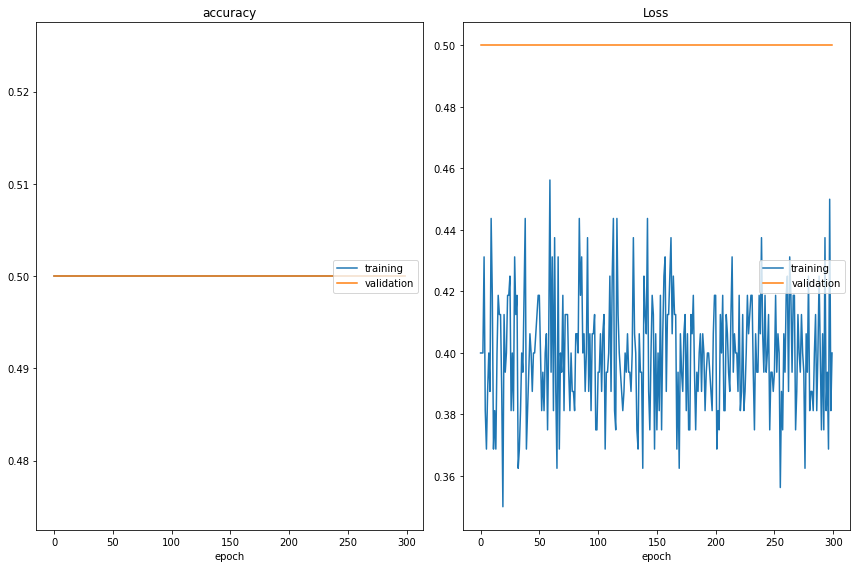

accuracy
	training         	 (min:    0.500, max:    0.500, cur:    0.500)
	validation       	 (min:    0.500, max:    0.500, cur:    0.500)
Loss
	training         	 (min:    0.350, max:    0.456, cur:    0.400)
	validation       	 (min:    0.500, max:    0.500, cur:    0.500)
8/8 [==============================] - 0s 61ms/step - loss: 0.4000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000


In [ ]:
epochs=300
history = model_300.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[PlotLossesKerasTF()]
)

## Overfitting

In the plots above, the training and validation accuracy is constant over time, 50% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. We will use *data augmentation* to our model.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

We will implement data augmentation using the following Keras preprocessing layers: `tf.keras.layers.RandomFlip`, `tf.keras.layers.RandomRotation`, and `tf.keras.layers.RandomZoom`. These can be included inside our model like other layers, and run on the GPU.

In [ ]:
input = Input(
              shape=(img_height, img_width, img_channel),
              name='Augmented input',
              dtype=np.uint8
              )
x = layers.RandomFlip(mode="horizontal_and_vertical",
                      input_shape=(img_height, img_width, 3))(input)
x = layers.RandomRotation(factor=(-0.2, 0.3))(x)
x = layers.RandomContrast(factor=(0.2, 1.))(x)
output = layers.RandomZoom(height_factor=(-0.5, 0.75), width_factor=(-0.64, 0.85))(x)

In [ ]:
data_augmentation = Model(input, output)

Visualize a few augmented examples by applying data augmentation to the same image several times:

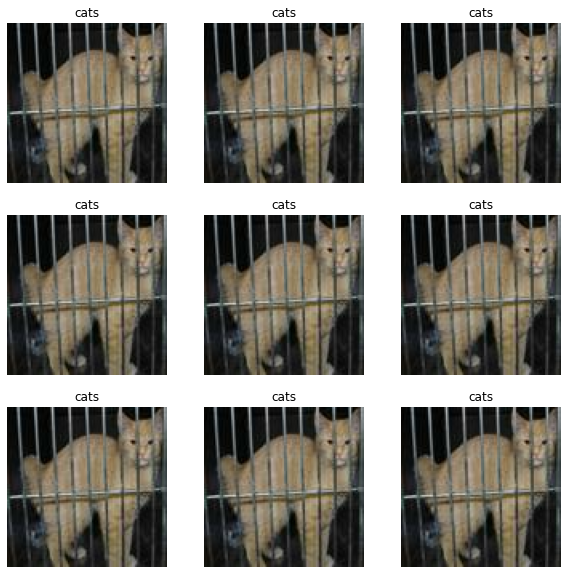

In [ ]:
plt.figure(figsize=(10, 10))
data_augmentation.trainable=True
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[1].numpy().astype("uint8"))
    plt.title(class_names[labels[1]])
    plt.axis("off")
    #plt.show()

We will add data augmentation to your model before training in the next step.

In [ ]:
aug_model = Model(input, model(output))

## Compile and train the model

In [ ]:
aug_model.compile(optimizer=op_sgd,
              loss='mse',
              metrics=['accuracy'])

In [ ]:
aug_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Augmented input (InputLayer  [(None, 100, 100, 3)]    0         
 )                                                               
                                                                 
 random_flip (RandomFlip)    (None, 100, 100, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 100, 100, 3)      0         
 tion)                                                           
                                                                 
 random_contrast (RandomCont  (None, 100, 100, 3)      0         
 rast)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 100, 100, 3)       0         
                                                           

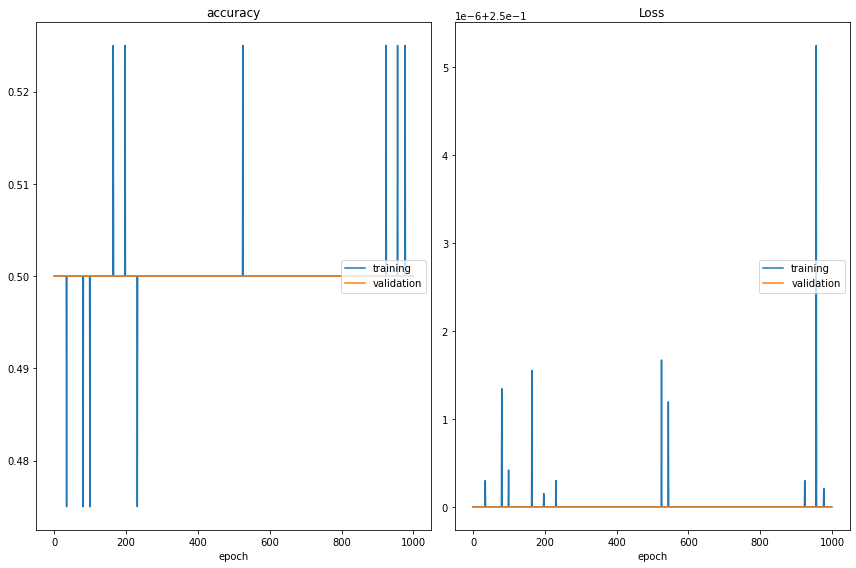

accuracy
	training         	 (min:    0.475, max:    0.525, cur:    0.500)
	validation       	 (min:    0.500, max:    0.500, cur:    0.500)
Loss
	training         	 (min:    0.250, max:    0.250, cur:    0.250)
	validation       	 (min:    0.250, max:    0.250, cur:    0.250)
8/8 [==============================] - 0s 61ms/step - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5000


In [ ]:
epochs=1000
history = aug_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[PlotLossesKerasTF()]
)

## Predict on new data

Use our model to classify an image that wasn't included in the training or validation sets.

Note: Data augmentation layer is inactive at inference time.

score [[0.5 0.5]]
This image most likely belongs to cats with a 50.00 percent confidence.


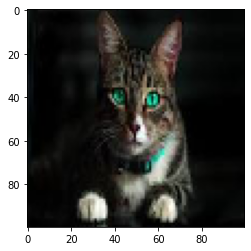

In [ ]:
cat_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFRWxLHdWd-iwNG6O82spoi8Nr3gZSwfArIc6Bf6NYHA&s"
cat_path = tf.keras.utils.get_file('cat', origin=cat_url)

img = tf.keras.utils.load_img(
    cat_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

score = aug_model.predict(img_array)
print('score {}'.format(score))
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
plt.imshow(img_array.numpy().astype("uint8").reshape(100, 100, 3))

score [[0.5 0.5]]
This image most likely belongs to cats with a 50.00 percent confidence.


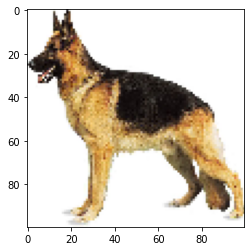

In [ ]:
dog_url = "https://cdn.britannica.com/60/8160-050-08CCEABC/German-shepherd.jpg"
dog_path = tf.keras.utils.get_file('dog', origin=dog_url)

img = tf.keras.utils.load_img(
    dog_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

score = aug_model.predict(img_array)

print('score {}'.format(score))
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
plt.imshow(img_array.numpy().astype("uint8").reshape(100, 100, 3))

221184/212377 [===============================] - 1s 2us/step


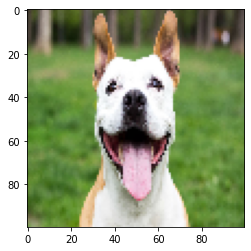

score [[0.5 0.5]]
This image most likely belongs to cats with a 50.00 percent confidence.


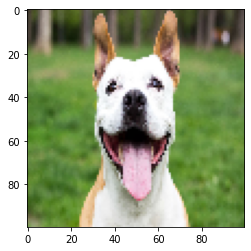

In [ ]:
dog_url = "https://ggsc.s3.amazonaws.com/images/uploads/The_Science-Backed_Benefits_of_Being_a_Dog_Owner.jpg"
dog_path = tf.keras.utils.get_file('dog_1', origin=dog_url)

img = tf.keras.utils.load_img(
    dog_path, target_size=(img_height, img_width)
)
plt.imshow(img)
plt.show()
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

score = aug_model.predict(img_array)

print('score {}'.format(score))
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
plt.imshow(img_array.numpy().astype("uint8").reshape(100, 100, 3))
plt.show()